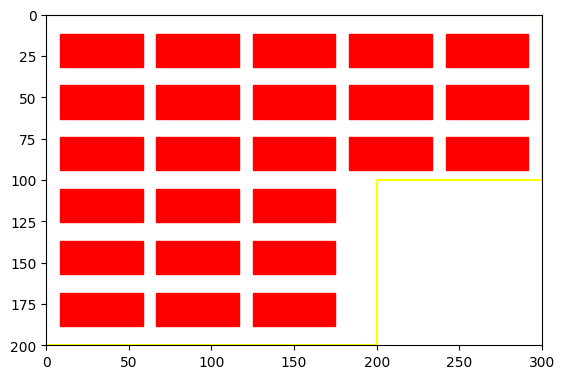

Total bricks placed: 24


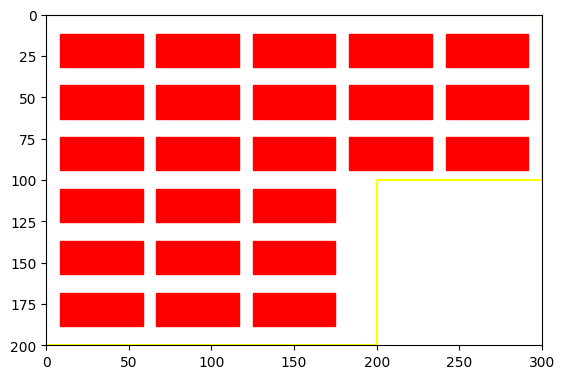

Total bricks placed: 24


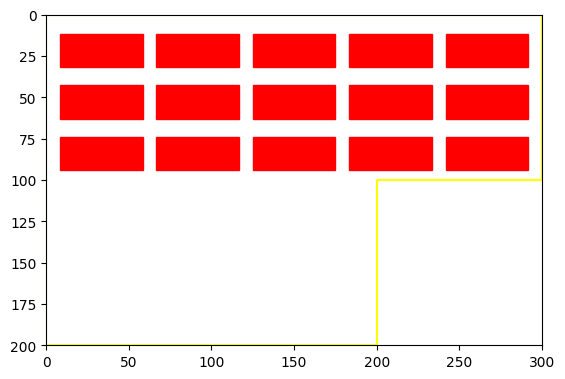

Total bricks placed: 15


In [35]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from shapely.geometry import Polygon, Point

brick_width = 50  # mm
brick_height = 20  # mm

house_shape = Polygon([(0, 0), (300, 0), (300, 100), (200, 100), (200, 200), (0, 200)])

def lay_bricks(house_shape, brick_width, brick_height, gap_x, gap_y, percentage):
    fig, ax = plt.subplots()
    x_min, y_min, x_max, y_max = house_shape.bounds
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_aspect('equal')
    x, y = house_shape.exterior.xy
    ax.plot(x, y, color='yellow')
    area_house = house_shape.area
    area_brick = brick_width * brick_height
    total_bricks = int(area_house / area_brick)
    bricks_to_lay = int(total_bricks * (percentage / 100.0))

    horizontal_gaps = int((x_max - x_min) // (brick_width + gap_x))
    vertical_gaps = int((y_max - y_min) // (brick_height + gap_y))

    if horizontal_gaps > 1:
        gap_x = (x_max - x_min - (horizontal_gaps * brick_width)) / (horizontal_gaps + 1)
    if vertical_gaps > 1:
        gap_y = (y_max - y_min - (vertical_gaps * brick_height)) / (vertical_gaps + 1)
    count = 0
    for i in range(vertical_gaps + 1):
        for j in range(horizontal_gaps + 1):
            if count >= bricks_to_lay:
                break
            brick_origin = Point(x_min + j * (brick_width + gap_x) + gap_x, y_min + i * (brick_height + gap_y) + gap_y)
            brick = Polygon([
                (brick_origin.x, brick_origin.y),
                (brick_origin.x + brick_width, brick_origin.y),
                (brick_origin.x + brick_width, brick_origin.y + brick_height),
                (brick_origin.x, brick_origin.y + brick_height)
            ])
            if house_shape.contains(brick):
                ax.add_patch(patches.Polygon(xy=list(brick.exterior.coords), closed=True, fill=True, edgecolor='red', facecolor='red'))
                count += 1

    plt.gca().invert_yaxis()
    plt.show()
    
    print(f'Total bricks placed: {count}')

lay_bricks(house_shape, brick_width, brick_height, 10, 10, 70)

lay_bricks(house_shape, brick_width, brick_height, 10, 10, 50)

lay_bricks(house_shape, brick_width, brick_height, 10, 10, 30)


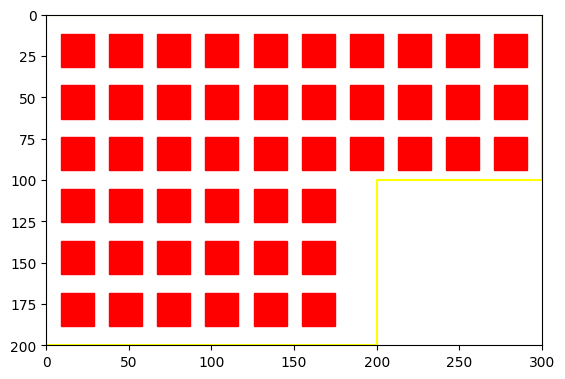

Percent 50, Total bricks placed: 48


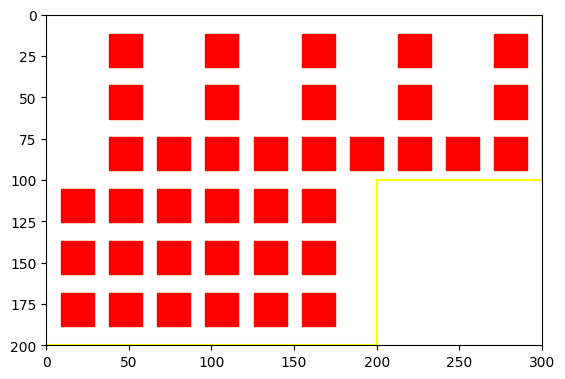

Percent 30, Total bricks placed: 37


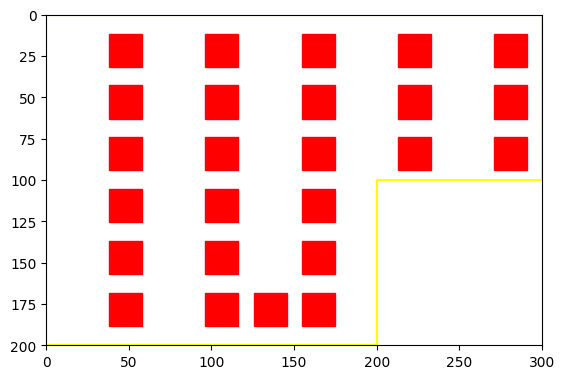

Percent 20, Total bricks placed: 25


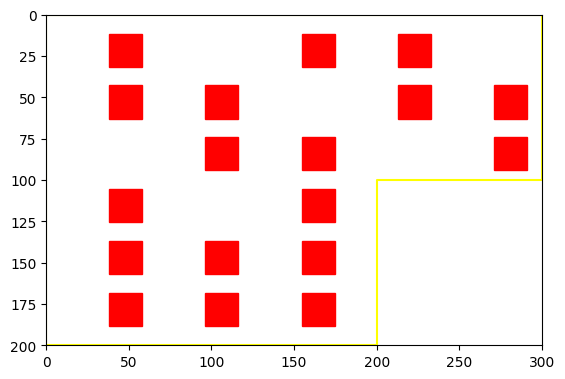

Percent 10, Total bricks placed: 18


In [20]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from shapely.geometry import Polygon, Point

brick_width = 20  # mm
brick_height = 20  # mm
gap_x = 10
gap_y = 10


house_shape = Polygon([(0, 0), (300, 0), (300, 100), (200, 100), (200, 200), (0, 200)])


def lay_bricks(house_shape, brick_width, brick_height, gap_x, gap_y, percentage):
    fig, ax = plt.subplots()
    x_min, y_min, x_max, y_max = house_shape.bounds
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_aspect('equal')

    x, y = house_shape.exterior.xy
    ax.plot(x, y, color='yellow')

    area_house = house_shape.area
    bricks_to_lay = int(area_house * (percentage / 100.0) / (brick_width * brick_height))


    num_rows = int((y_max - y_min) // (brick_height + gap_y))
    num_cols = int((x_max - x_min) // (brick_width + gap_x))

    if num_cols > 1:
        gap_x = (x_max - x_min - num_cols * brick_width) / (num_cols + 1)
    if num_rows > 1:
        gap_y = (y_max - y_min - num_rows * brick_height) / (num_rows + 1)

    bricks = []
    for i in range(num_rows + 1):
        for j in range(num_cols + 1):
            brick_origin = Point(x_min + j * (brick_width + gap_x) + gap_x,
                                 y_min + i * (brick_height + gap_y) + gap_y)
            brick = Polygon([
                (brick_origin.x, brick_origin.y),
                (brick_origin.x + brick_width, brick_origin.y),
                (brick_origin.x + brick_width, brick_origin.y + brick_height),
                (brick_origin.x, brick_origin.y + brick_height)
            ])
            if house_shape.contains(brick):
                bricks.append(brick)

    total_bricks = len(bricks)
    required_bricks = bricks_to_lay

    if percentage < 100:
        remove_bricks = total_bricks - required_bricks
        bricks_to_remove = set()
        step = 1
        while remove_bricks > 0:
            for i in range(0, total_bricks, step + 1):
                if i < total_bricks:
                    bricks_to_remove.add(i)
                    remove_bricks -= 1
                    if remove_bricks <= 0:
                        break
            step += 1
        bricks = [brick for idx, brick in enumerate(bricks) if idx not in bricks_to_remove]
        
    for brick in bricks:
        ax.add_patch(patches.Polygon(xy=list(brick.exterior.coords), closed=True, fill=True, edgecolor='red', facecolor='red'))

    plt.gca().invert_yaxis()
    plt.show()
    
    print(f'Percent {percentage}, Total bricks placed: {len(bricks)}')

lay_bricks(house_shape, brick_width, brick_height, gap_x, gap_y, 50)
lay_bricks(house_shape, brick_width, brick_height, gap_x, gap_y, 30)
lay_bricks(house_shape, brick_width, brick_height, gap_x, gap_y, 20)
lay_bricks(house_shape, brick_width, brick_height, gap_x, gap_y, 10)
